In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

In [3]:
telecom_df = pd.read_csv("../data/bigml_59c28831336c6604c800002a.csv")

In [4]:
telecom_df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

In [6]:
# check for null values in the dataset
print("There are " + ("some" if telecom_df.isnull().values.any() else "no")  + " null/missing values in the dataset.")

There are no null/missing values in the dataset.


In [7]:
telecom_df.shape

(3333, 21)

In [8]:
df = telecom_df.drop(['phone number'],axis=1)
df.shape

(3333, 20)

In [9]:
#I've dropped telephone number

In [10]:
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [11]:
df["area code"].value_counts()

415    1655
510     840
408     838
Name: area code, dtype: int64

In [12]:
df["international plan"].value_counts()

no     3010
yes     323
Name: international plan, dtype: int64

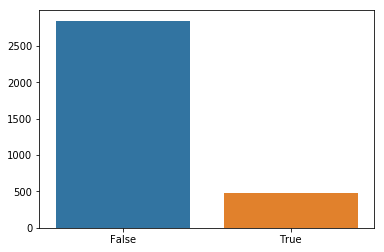

In [13]:
y = df["churn"].value_counts()

sns.barplot(y.index, y.values)

In [14]:
churn_perc = df["churn"].sum() * 100 / df["churn"].shape[0]
print("Churn percentage is %.3f%%." % churn_perc)

Churn percentage is 14.491%.


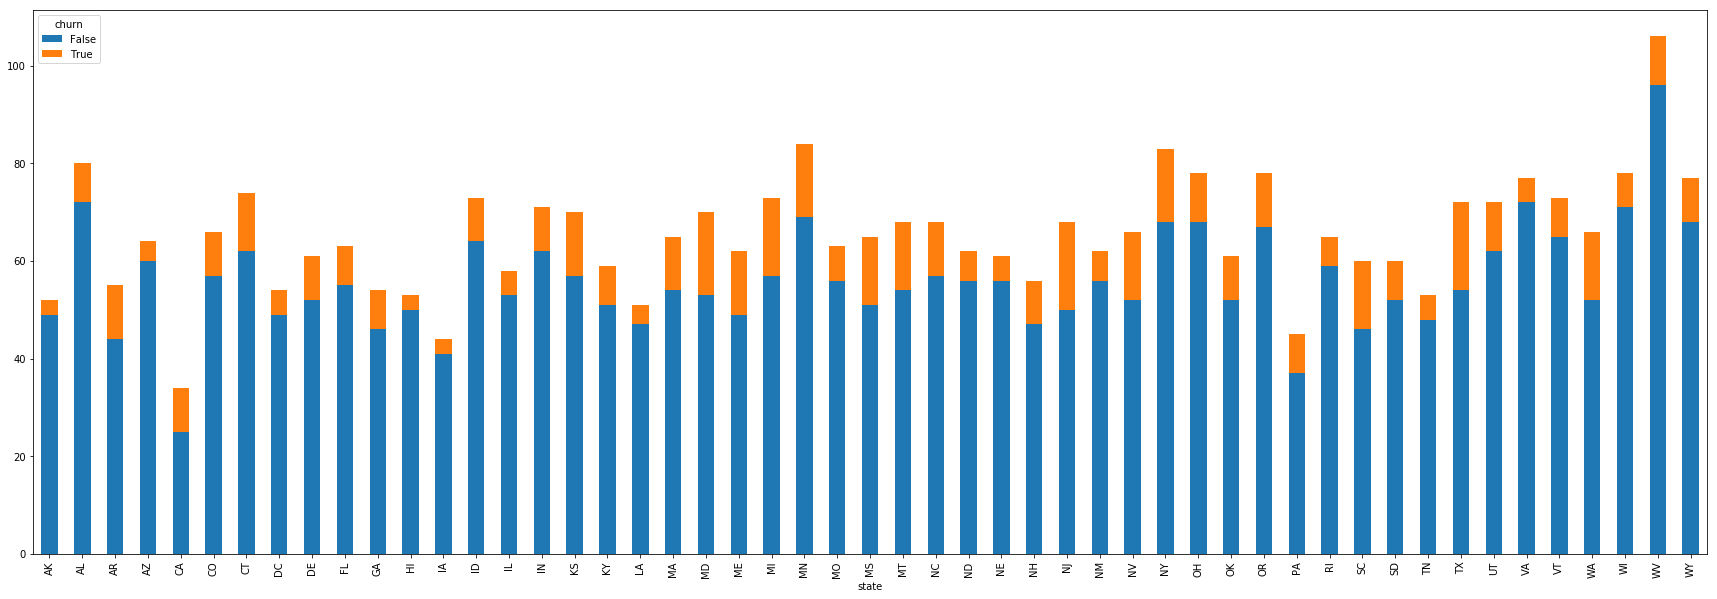

In [15]:
df.groupby(["state", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10))

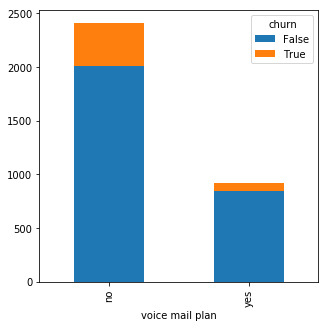

In [16]:
df.groupby(["voice mail plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

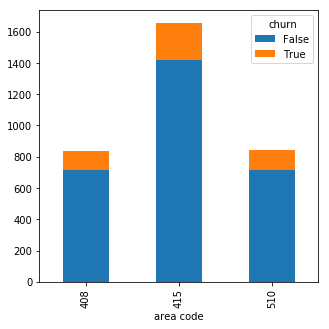

In [17]:
df.groupby(["area code", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5))

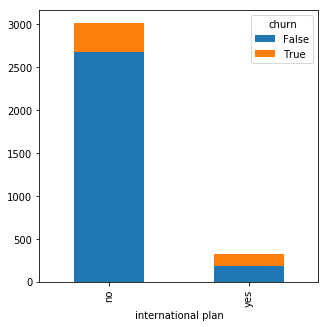

In [18]:
df.groupby(["international plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5))

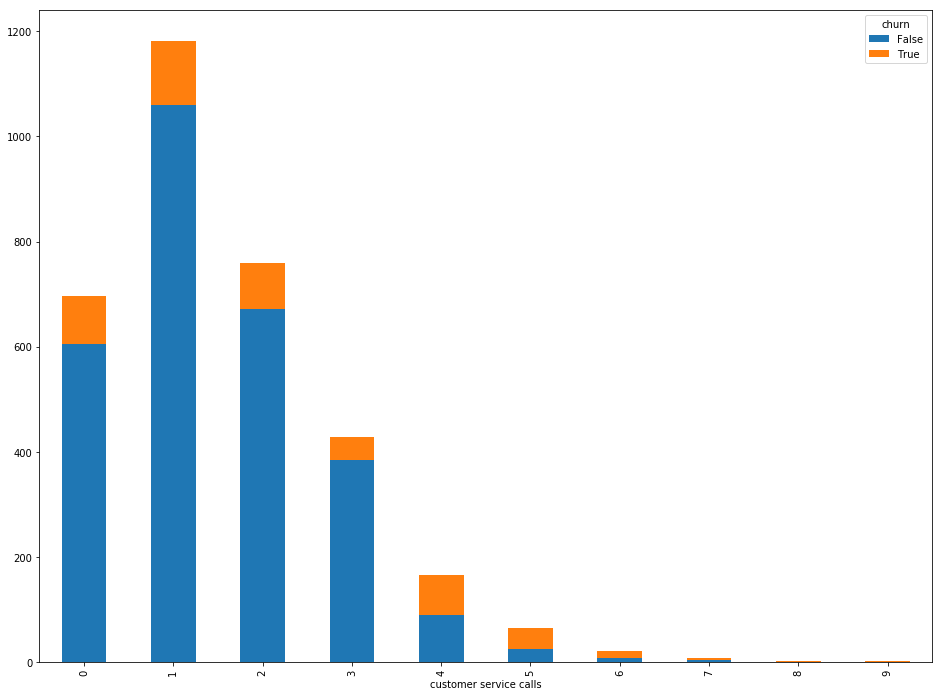

In [19]:
df.groupby(["customer service calls", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(16,12))


In [20]:
df_group0= df.groupby(["customer service calls", "churn"]).size().unstack()
df_group0

churn,False,True
customer service calls,,
0,605.0,92.0
1,1059.0,122.0
2,672.0,87.0
3,385.0,44.0
4,90.0,76.0
5,26.0,40.0
6,8.0,14.0
7,4.0,5.0
8,1.0,1.0


In [21]:
df_percentage = pd.DataFrame()
df_percentage["False"] = ((df_group0.iloc[:,0] /(df_group0.iloc[:,0] + df_group0.iloc[:,1]))*100).values
df_percentage["True"] = ((df_group0.iloc[:,1] /(df_group0.iloc[:,0] + df_group0.iloc[:,1]))*100).values
df_percentage

,False,True
0,86.800574,13.199426
1,89.669771,10.330229
2,88.537549,11.462451
3,89.743590,10.256410
4,54.216867,45.783133
5,39.393939,60.606061
6,36.363636,63.636364
7,44.444444,55.555556
8,50.000000,50.000000
9,NaN,NaN


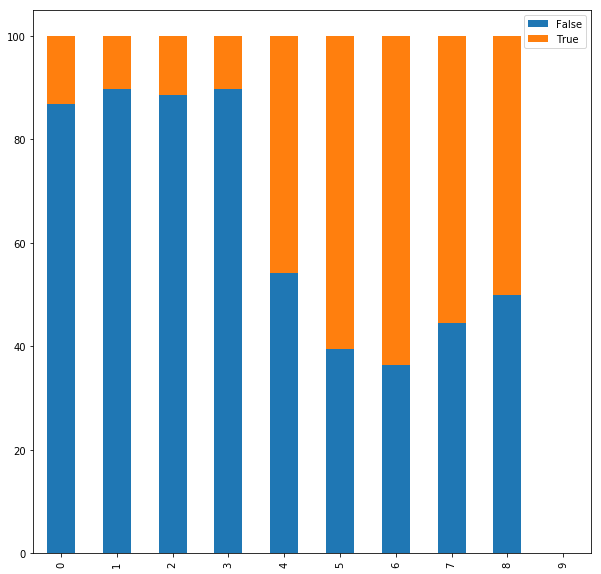

In [24]:
df_percentage.plot(kind='bar', stacked=True, figsize=(10,10))

In [23]:
corr= df.corr()
corr

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total day charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
total eve charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493


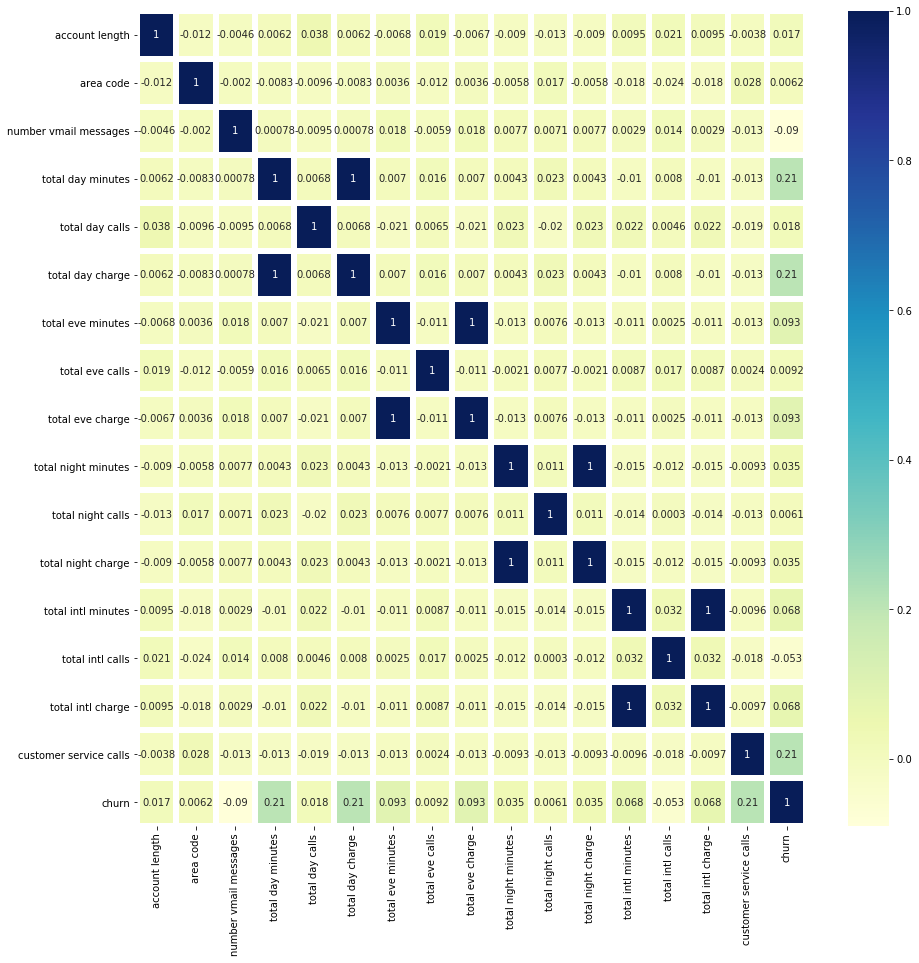

In [62]:
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(data = corr, annot = True, annot_kws = {"size": 10}, linewidth = 5, cmap="YlGnBu")
plt.show()

# LOGISTIC REGRESSION

In [63]:
#i choosed logistic regression as baseline model

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score


In [26]:
# converting target variable into integer
df["international plan"] = df["international plan"]== "yes"
df["voice mail plan"] = df["voice mail plan"]== "yes"
df['churn'] = df['churn'].astype(int)
df['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [27]:
X = df.drop(['state',"account length","area code","churn"],axis=1)
y = df["churn"]


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44) 

In [29]:
X_train_v, X_val, y_train_v, y_val = train_test_split(X_train,y_train,test_size=0.2, random_state=52)

In [30]:
#scale the dataset

from sklearn.preprocessing import StandardScaler 

ss = StandardScaler()

ss.fit(X_train_v)

X_train_v = ss.transform(X_train_v)
X_val = ss.transform(X_val)

X_test = ss.transform(X_test)

In [31]:
l_reg = LogisticRegression(fit_intercept=True, C=1e12, solver='liblinear', random_state=42)
l_reg.fit(X_train_v, y_train_v)
l_reg

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
y_train_pred = l_reg.predict_proba(X_train_v)[:,1]

Train score

In [33]:
print("ROC_AUC of model =", roc_auc_score(y_train_v, y_train_pred))

ROC_AUC of model = 0.8211228420602082


Validation score

In [34]:
y_val_pred = l_reg.predict(X_val)

print("ROC_AUC of model =", roc_auc_score(y_val, y_val_pred))

ROC_AUC of model = 0.6576992627625539


Hyperparameter tuning on Logistic regression

In [35]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [65]:
skf = StratifiedKFold(n_splits = 7, random_state = 600, shuffle=True)

param_grid = {
              'C' : [1, 10, 100, 1000]
              }

opt_model = GridSearchCV(LogisticRegression(random_state=42,max_iter=10000,penalty='l2'),
                         param_grid,
                         cv=skf,
                         scoring='roc_auc',
                         return_train_score=True)

opt_model.fit(X_train,y_train)

pd.DataFrame(opt_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,mean_train_score,std_train_score
0,0.454143,0.078721,0.002567,0.000150,1,{'C': 1},0.799936,0.787018,0.871143,0.796787,0.826892,0.813334,0.834664,0.818539,0.026557,4,0.828072,0.833014,0.819233,0.832173,0.824059,0.828221,0.822686,0.826780,0.004672
1,0.366742,0.154400,0.002673,0.000246,10,{'C': 10},0.802818,0.786164,0.869168,0.797374,0.828867,0.813227,0.837597,0.819317,0.026187,3,0.828673,0.834163,0.820127,0.833072,0.824938,0.829290,0.824142,0.827772,0.004655
2,0.362979,0.102336,0.003115,0.000664,100,{'C': 100},0.806768,0.785417,0.869969,0.797961,0.828814,0.812960,0.835533,0.819632,0.025970,1,0.828948,0.834310,0.820188,0.833116,0.824991,0.829513,0.823707,0.827825,0.004743
3,0.316436,0.079601,0.003448,0.001342,1000,{'C': 1000},0.806768,0.785951,0.869649,0.798281,0.828654,0.810558,0.835913,0.819396,0.025873,2,0.828945,0.834356,0.820145,0.833177,0.824890,0.829949,0.823731,0.827885,0.004802


In [39]:
opt_model.best_score_

0.8196318168111641